In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
#importing dataset
#fashion-MNIST
#this is a dataset of 28x28 grayscale images of clothes, belonging to 10 classes
#a harder, more robust alternative to MNIST (modified national institute of standards and technology)

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

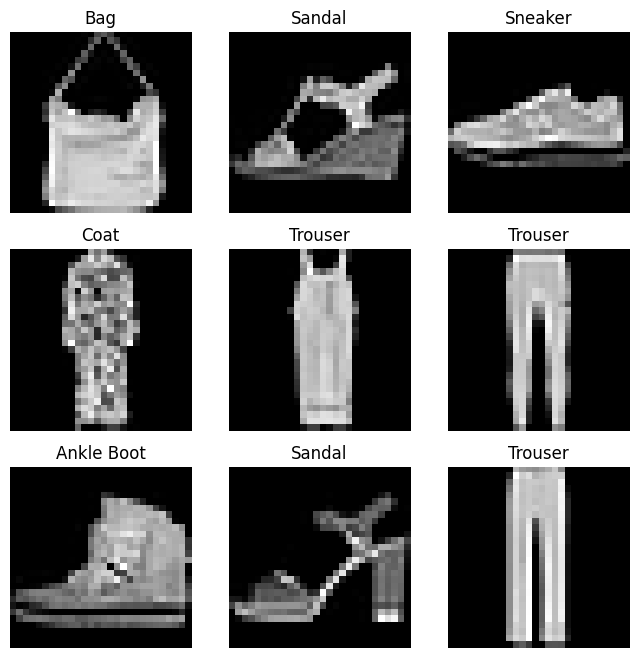

In [3]:
#manually indexing
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

#matplotlib to visualise samples
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [4]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None): #runs when a customimagedataset dataset object is created
        self.img_labels = pd.read_csv(annotations_file) #self refers to the instance of the class
        self.img_dir = img_dir #directory where images are stored
        self.transform = transform #optional transform to be applied on a sample
        self.target_transform = target_transform #optional transform to be applied on a target label

    def __len__(self):
        return len(self.img_labels) #func to return len of dataset

    def __getitem__(self, idx): #finds the item in database and returns it as a tensor
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform: #applies transform if applicable
            image = self.transform(image)
        if self.target_transform: #same
            label = self.target_transform(label)
        return image, label

In [5]:
#preparing to train model
#when training a model we pass in minibatches of data, and we shuffle the data every epoch to prevent overfitting

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


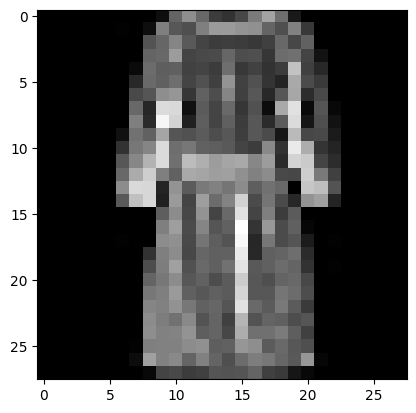

In [6]:
train_features, train_labels = next(iter(train_dataloader)) 
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()